<a href="https://colab.research.google.com/github/crjohnson09/SEIS764/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colton Johnson <br>
SEIS 764-02

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/crjohnson09/SEIS764/main/insurance%20(1).csv"
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [146]:
df.head(1)

,age,sex,bmi,children,smoker,region,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.9,0,yes,southwest,0,1,0,0,1


<h1>Data cleaning from Assignment 2</h1>

In [3]:
#drop dups
df =df[~df.duplicated(keep='last')].reset_index(drop=True)
#dummies
cata=df.select_dtypes("object")
dummies = pd.get_dummies(cata,drop_first=True) # first class is also dropped
df = pd.concat([df,dummies], axis=1)
#set up x and y
y = df.pop("charges")
X = df[df.columns.difference(["sex","smoker","region"])]
# normalize
data=X.select_dtypes(["int","float"])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1) # train test split 70-30

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#train
to_norm = X_train.select_dtypes(["int","float"])
X_normalized = pd.DataFrame(scaler.fit_transform(to_norm),columns=["age-norm","bmi-norm","children-norm"],index=to_norm.index)
X_train = pd.concat([X_train,X_normalized],axis=1)
X_train=X_train.iloc[:,3:]
#test
to_norm = X_test.select_dtypes(["int","float"])
X_normalized= pd.DataFrame(scaler.transform(to_norm),columns=["age-norm","bmi-norm","children-norm"],index=to_norm.index)
X_test = pd.concat([X_test,X_normalized],axis=1)
X_test=X_test.iloc[:,3:]

In [4]:
y_train

520      3994.177800
575      1664.999600
769     27941.287580
314      9722.769500
426      7323.734819
            ...     
715      9566.990900
905      4846.920150
1096     1674.632300
235      1615.766700
1061    48970.247600
Name: charges, Length: 935, dtype: float64

In [5]:
X_train.shape

(935, 8)

In [6]:
X_train.head(2)

,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes,age-norm,bmi-norm,children-norm
520,0,1,0,0,0,-0.50753,2.242167,-0.907238
575,0,1,0,1,0,-1.21792,-0.630726,-0.907238


<h1>Part 1 </h1> <br>
<span>In the last assignment, you worked on the insurance dataset and built a regression model with one Dense unit. Using 
the same dataset, this time build a deep neural network for regression. Use a 70-30 train-test split. You should try the 
following:<br>  
• Different number of hidden layers.  <br>
• Different number of units in each of the hidden layers.  <br>
• Different learning rates  <br>
• Different optimizers  <br>
You should summarize and explain which architecture gave you the best results. </span>


In [7]:
# #model design
# model1 = tf.keras.models.Sequential([
#   tf.keras.layers.Dense(64, input_shape=(8,), activation='relu'),
#   tf.keras.layers.Dense(1)
# ])
# #define opt and loss
# opt =tf.keras.optimizers.Adam(0.01)
# model1.compile(optimizer=opt, loss='mean_squared_error')

In [157]:
# Wide model
model1 = tf.keras.models.Sequential()

#Adding input layer 
model1.add(tf.keras.layers.Dense(units=128, input_shape=[8], activation='relu'))
# model1.add(tf.keras.layers.Dropout(0.1))

#Adding hidden layer
model1.add(tf.keras.layers.Dense(units=64, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.01))

#Adding hidden layer
model1.add(tf.keras.layers.Dense(units=32, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.01))

#Adding hidden layer
model1.add(tf.keras.layers.Dense(units=16, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.01))

#Adding hidden layer
model1.add(tf.keras.layers.Dense(units=8, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.01))

#Adding hidden layer
model1.add(tf.keras.layers.Dense(units=2, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.01))

#Adding hidden layer Odd layer
model1.add(tf.keras.layers.Dense(units=3, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.01))

#Adding an output layer
model1.add(tf.keras.layers.Dense(units=1))

model1.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='mean_squared_error')

In [163]:
# wave model
model1 = tf.keras.models.Sequential()

#Adding input layer 
model1.add(tf.keras.layers.Dense(units=32, input_shape=[8], activation='relu'))
# model1.add(tf.keras.layers.Dropout(0.1))

#Adding hidden layer
model1.add(tf.keras.layers.Dense(units=16, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.01))

#Adding hidden layer
model1.add(tf.keras.layers.Dense(units=8, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.01))

# #Adding hidden layer
# model1.add(tf.keras.layers.Dense(units=16, activation='relu'))
# model1.add(tf.keras.layers.Dropout(0.01))

# #Adding hidden layer
# model1.add(tf.keras.layers.Dense(units=32, activation='relu'))
# model1.add(tf.keras.layers.Dropout(0.01))

# #Adding hidden layer
# model1.add(tf.keras.layers.Dense(units=16, activation='relu'))
# model1.add(tf.keras.layers.Dropout(0.01))


# #Adding hidden layer
# model1.add(tf.keras.layers.Dense(units=8, activation='relu'))
# model1.add(tf.keras.layers.Dropout(0.01))


#Adding hidden layer
model1.add(tf.keras.layers.Dense(units=4, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.01))


#Adding hidden layer Odd layer
model1.add(tf.keras.layers.Dense(units=2, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.01))

#Adding an output layer
model1.add(tf.keras.layers.Dense(units=1))

model1.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='mean_squared_error')

In [150]:
var_num=6

# Deep Model
model1 = tf.keras.models.Sequential()

#Adding input layer 
model1.add(tf.keras.layers.Dense(units=var_num, input_shape=[8], activation='relu'))
# model1.add(tf.keras.layers.Dropout(0.1))

#Adding hidden layer
model1.add(tf.keras.layers.Dense(units=var_num, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.01))

#Adding hidden layer
model1.add(tf.keras.layers.Dense(units=var_num, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.01))

#Adding hidden layer
model1.add(tf.keras.layers.Dense(units=var_num, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.01))

#Adding hidden layer
model1.add(tf.keras.layers.Dense(units=var_num, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.01))

#Adding hidden layer
model1.add(tf.keras.layers.Dense(units=var_num, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.01))

#Adding hidden layer
model1.add(tf.keras.layers.Dense(units=var_num, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.01))

#Adding hidden layer
model1.add(tf.keras.layers.Dense(units=var_num, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.01))

#Adding hidden layer
model1.add(tf.keras.layers.Dense(units=var_num, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.01))

#Adding hidden layer
model1.add(tf.keras.layers.Dense(units=var_num, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.01))

#Adding hidden layer
model1.add(tf.keras.layers.Dense(units=var_num, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.01))

#Adding hidden layer
model1.add(tf.keras.layers.Dense(units=var_num/2, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.01))


#Adding an output layer
model1.add(tf.keras.layers.Dense(units=1))

model1.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mean_squared_error')

In [ ]:
model1.summary()
#RMSprop


30/30 [==============================] - 0s 2ms/step - loss: 22293702.0000
Train score: 22293702.0
13/13 [==============================] - 0s 2ms/step - loss: 24011504.0000
Test score: 24011504.0


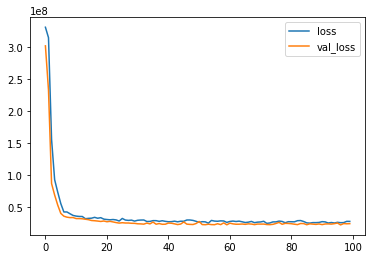

0.8334983326112209

In [164]:
r1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

# Evaluate the model, prints loss and accuracy
print("Train score:", model1.evaluate(X_train, y_train))
print("Test score:", model1.evaluate(X_test, y_test))

# Plot the loss
import matplotlib.pyplot as plt
plt.plot(r1.history['loss'], label='loss')
plt.plot(r1.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


from sklearn.metrics import r2_score
y_true = np.array( [y_test] )

y_pred = model1.predict(X_test)
y_pred = [num for sublist in y_pred for num in sublist]
r2_score(y_true[0], y_pred)

The Adam optimizer appeared to have the best validation pattern; a deeper network did better than wider (many 6 node layers vs one big input (128) and halving nodes per layer until get to 1); also a "wave" like structure, going "wide to narrow to wide to narrow" doesn't appear to help as "removing the wave" and just going down performs better;

In [159]:
# model1.get_weights()

<h1>performance review</h1>

In [34]:
from sklearn.metrics import r2_score

y_true = np.array( [y_test] )

In [35]:
y_pred = model1.predict(X_test)
y_pred = [num for sublist in y_pred for num in sublist]
r2_score(y_true[0], y_pred)

-1.1020880066337657

<h1> Part Two</h1>
<span>In class, we worked on the customers.csv dataset and trained a NN with 2 hidden layers (with relu) and one unit output 
layer (with sigmoid). Use that model to perform prediction on the following customer:   <br>
Credit Score: 600   <br>
Geography: France  <br>
Gender: Male  <br>
Age: 40 years old <br> 
Tenure: 3 years  <br>
Balance: \$60000 <br>
Number of Products: 2  <br>
Does this customer have a credit card ? Yes  <br>
Is this customer an Active Member: Yes  <br>
Estimated Salary: $50000  </span>

In [16]:
url = "https://raw.githubusercontent.com/crjohnson09/SEIS764/main/customers.csv"
dataset = pd.read_csv(url)

In [66]:
X = dataset.iloc[:,3:13].values
y = dataset.iloc[:,13].values
print(X[0])
print(len(X[0]))
# print(X)
# print(y)

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Label Encoding Gender
labelencoder_X = LabelEncoder()
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])
print(X[0])
print(len(X[0]))
#Dealing with the categorical Geography column
from sklearn.compose import make_column_transformer
onehotencoder = make_column_transformer((OneHotEncoder(), [1]), 
remainder='passthrough')
X = onehotencoder.fit_transform(X)
#Removing the extra dummy variable
X = X[:, 1:]
print(X[0])
print(len(X[0]))

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

print(X_train[0])
print(len(X_train[0]))

[619 'France' 'Female' 42 2 0.0 1 1 1 101348.88]
10
[619 'France' 0 42 2 0.0 1 1 1 101348.88]
10
[0.0 0.0 619 0 42 2 0.0 1 1 1 101348.88]
11
[-0.57715782 -0.57523331 -2.27010736  0.90659167 -0.18483345 -1.7326102
  0.70420559 -0.91070619  0.64589732  0.96776914  0.29474901]
11


In [ ]:
#ran once to find best param

# !pip install scikeras[tensorflow]
# #Hyperparameter tuning of Neural Network
# from scikeras.wrappers import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# def buildNN():
#     model = tf.keras.models.Sequential()
#     model.add(tf.keras.layers.Dense(units=6, input_shape=[11], activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.1))
#     model.add(tf.keras.layers.Dense(units=6, activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.1))
#     model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', metrics=['accuracy'])
#     return model
# classifier = KerasClassifier(model = buildNN)
# parameters = {'batch_size':[25,32], 'epochs':[10,15], 'optimizer':
# ['adam','rmsprop']}
# grid_search = GridSearchCV(estimator =classifier, param_grid=parameters, 
# scoring='accuracy', cv=10)
# grid_search = grid_search.fit(X_train, y_train)
# best_param = grid_search.best_params_
# best_acc=grid_search.best_score_
# print(best_param)
# print(best_acc)

In [22]:
# Define the model
model2 = tf.keras.models.Sequential()

#Adding a first layer 
model2.add(tf.keras.layers.Dense(units=6, input_shape=[11], activation='relu'))
model2.add(tf.keras.layers.Dropout(0.1))

#Adding a second hidden layer
model2.add(tf.keras.layers.Dense(units=6, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.1))

#Adding an output layer
model2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
# Train the model
r2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, verbose=0,batch_size=25)

In [ ]:
# Evaluate the model, prints loss and accuracy
print("Train score:", model2.evaluate(X_train, y_train))
print("Test score:", model2.evaluate(X_test, y_test))

# Plot the loss
import matplotlib.pyplot as plt
plt.plot(r2.history['loss'], label='loss')
plt.plot(r2.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Plot the accuracy 
plt.plot(r2.history['accuracy'], label='acc')
plt.plot(r2.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [35]:
#create record to predict against
sample1=[600,"France","Male",40,3,60000,2,1,1,50000]
#labels
sample1[2] = labelencoder_X.transform([sample1[2],])[0]
#onehot
sample1 = onehotencoder.transform([sample1,])[0]
#drop extra
sample1=sample1[1:]
#normalize
sample1=sc_X.transform([sample1,])
print(sample1)
print(X_test[4])

[[-0.57484841 -0.57792762 -0.52334318  0.91301738  0.10126171 -0.70240781
  -0.263704    0.81360162  0.64764683  0.96922337 -0.86874239]]
[-0.57484841 -0.57792762  0.60490296 -1.0952694   0.10126171  1.37918599
  0.87887049 -0.9110441   0.64764683  0.96922337  0.06994988]


In [58]:
#result
np.round(model2.predict([sample1,])).flatten()

array([0.], dtype=float32)

In [65]:
sample2=np.array([list(X_test[4])])
print("input data ",sample2[0])

#read original input
mylist=[round(item, 2) for item in sc_X.inverse_transform([sample2][0])[0]]
print("original data ", mylist)

#should be class 1
print("class: ",np.round(model2.predict([sample2,])))

input data  [-0.58293145  1.73320628 -0.48691364 -1.09251259 -0.46587306 -0.7016056
 -1.23072471  0.81976357  0.64706357 -1.03330429 -1.06626636]
original data  [0.0, 1.0, 604.0, 0.0, 34.0, 3.0, 0.0, 2.0, 1.0, 0.0, 38587.7]
class:  [[0.]]


In [60]:
y_pred=np.round(model2.predict(X_test[0:100])).flatten()
print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1.]


In [61]:
y_test[0:100]

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

<h1> Part three</h1>
<span>....<br>
Build a deep NN to get the best classification performance on the dataset (70-30 train-test split). You should be trying 
out different architectures of the NN before settling on the best one. Explain the results while comparing the different 
models. </span>

In [ ]:
url = "https://raw.githubusercontent.com/crjohnson09/SEIS764/main/onlineStore.csv"
dataset = pd.read_csv(url)

In [ ]:
dataset

In [ ]:
dataset.time_of_day.unique()

In [ ]:
X = dataset.iloc[:,:5].values
y = dataset.iloc[:,5].values

In [ ]:
#one hot time
# from sklearn.compose import make_column_transformer
# onehotencoder2 = make_column_transformer((OneHotEncoder(), [1]), 
# remainder='passthrough')
# X.time_of_day = onehotencoder2.fit_transform(X.time_of_day)
# #Removing the extra dummy variable
# X = X[:, 1:]
print(X[0])
onehotencoder2 = make_column_transformer((OneHotEncoder(), [4]), 
remainder='passthrough')
X = onehotencoder2.fit_transform(X)

print(X[0])


In [ ]:
#one hot time
from sklearn.compose import make_column_transformer
onehotencoder2 = make_column_transformer((OneHotEncoder(), [1]), 
remainder='passthrough')
X.time_of_day = onehotencoder2.fit_transform(X.time_of_day)
#Removing the extra dummy variable
X = X[:, 1:]
print(X[0])
print(len(X[0]))
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
# %%shell
# jupyter nbconvert "/content/Assignment2copy.ipynb"